<a href="https://colab.research.google.com/github/Dhanapal-Angamuthu/MachineLearnings/blob/main/DimensionalityReductionUsing%20PCA/DimensionalityReductionUsing_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Use inbuild dataset
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(data['DESCR'])
## Data is having 30 independant feaures

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
'''
the data['data'] array as the data and the data['feature_names'] array as the column names. This effectively organizes the
breast cancer dataset into a structured table with meaningful column headers.
'''
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
## Convert data values in the range of 0 to 1 as they are varying in values using MinMaxScaler. Another option we can use StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
###  calculates the minimum and maximum values for each feature in the df DataFrame. These values will be used later to scale the data.
scaler.fit(df)
### The transform method uses the minimum and maximum values calculated during the fit step to scale each feature's values to be within the range of 0 to 1.
scaled_data = scaler.transform(df)
scaled_data

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
### import PCA for dimentionality reduction
from sklearn.decomposition import PCA
### Reduce the 30 attributes/dimension to 3 dimension
pca = PCA(n_components=3)
### Fit the PCA model to the scaled_data. This means that PCA learns the principal components from data
pca.fit(scaled_data)
### transforms the scaled_data into the new lower-dimensional space defined by the principal components learned in the previous step.
### The result is stored in the variable x_pca, which now contains data with reduced dimensions (in this case, 3 dimensions as specified earlier in the cell).
x_pca = pca.transform(scaled_data)
x_pca


array([[ 1.38702121,  0.42689533, -0.54170264],
       [ 0.46230825, -0.55694674, -0.20517458],
       [ 0.95462147, -0.10970115, -0.1478484 ],
       ...,
       [ 0.22631131, -0.28794577,  0.31522402],
       [ 1.67783369,  0.33594595,  0.29611601],
       [-0.90506804, -0.10410875,  0.38285992]])

In [ ]:
scaled_data.shape

(569, 30)

In [ ]:
x_pca.shape

(569, 3)

Text(0, 0.5, 'Second Principal Component')

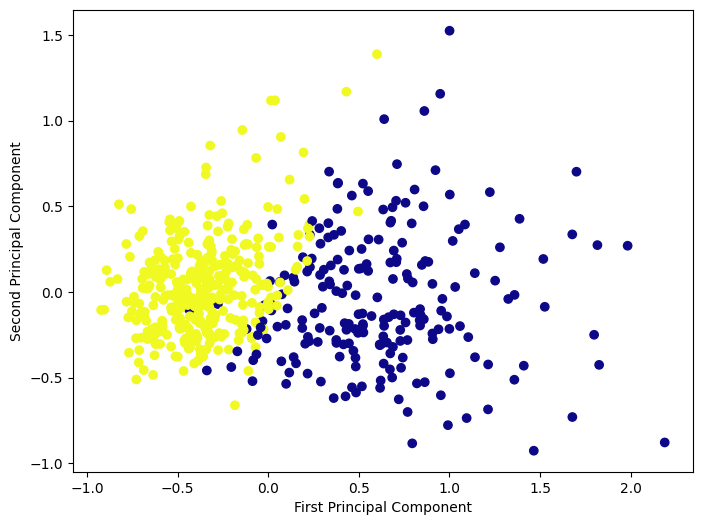

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')